<a href="https://colab.research.google.com/github/SandeepK1729/Research/blob/master/Hi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from random import randint
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import cm 
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
DATA_URL = 'salary.csv'

In [4]:
unprocessed_data = pd.read_csv(DATA_URL)
data = pd.read_csv(DATA_URL)
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
salary            32561
dtype: int64

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
def normalize_field(dataset, field_name):
    dataset[field_name] = dataset[field_name] / dataset[field_name].max()
    return dataset

In [7]:
def one_hot_field(dataset, field_name):
    field_one_hot = pd.get_dummies(data[field_name], prefix=f"{field_name}=", prefix_sep="")
    dataset = pd.concat([data, field_one_hot], axis=1)
    dataset = dataset.drop([field_name], axis=1)
    return dataset

In [8]:
def binary_encode_field(dataset, field_name, new_name):
    unique_values = dataset[field_name].unique()
    replace_nums = {field_name: {unique_values[0]: 0, unique_values[1]: 1}}
    dataset = dataset.replace(replace_nums)
    dataset.columns = dataset.columns.str.replace(field_name, new_name)
    return dataset

In [9]:
numerical_fields = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
categorical_fields = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "native-country"]
binary_fields = ["sex", "salary"]
new_names = ["is_female", "salary_greater_than_50k"]

In [10]:
for field in numerical_fields:
    data = normalize_field(data, field)

In [11]:
for i, field in enumerate(binary_fields):
    data = binary_encode_field(data, field, new_names[i])

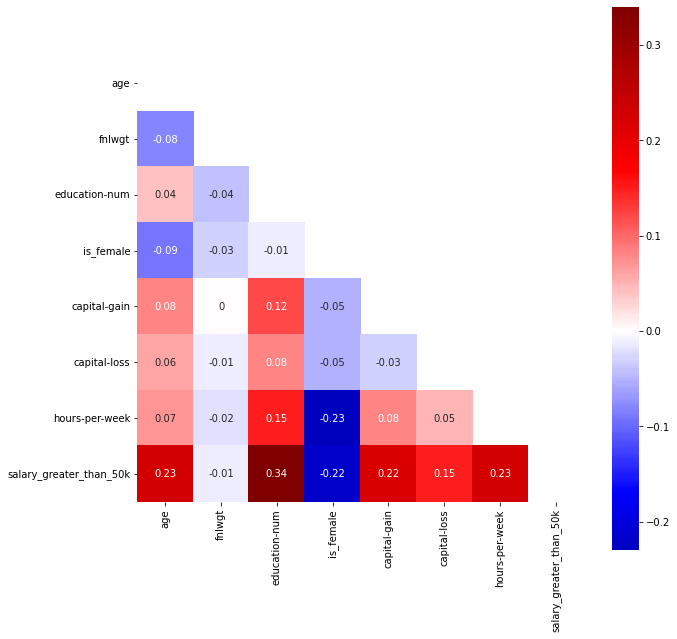

In [12]:
plt.figure(figsize=[10,10])
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(round(data.corr(),2), mask=mask, center=0, square=True, annot=True, annot_kws={"size":10}, cmap=cm.seismic)

In [13]:
for field in categorical_fields:
    data = one_hot_field(data, field)

In [14]:
data.head()

,age,fnlwgt,education-num,is_female,capital-gain,capital-loss,hours-per-week,salary_greater_than_50k,workclass= ?,workclass= Federal-gov,...,native-country= Portugal,native-country= Puerto-Rico,native-country= Scotland,native-country= South,native-country= Taiwan,native-country= Thailand,native-country= Trinadad&Tobago,native-country= United-States,native-country= Vietnam,native-country= Yugoslavia
0,0.433333,0.052210,0.8125,0,0.02174,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.555556,0.056113,0.8125,0,0.00000,0.0,0.131313,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.422222,0.145245,0.5625,0,0.00000,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.588889,0.158093,0.4375,0,0.00000,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.311111,0.227930,0.8125,1,0.00000,0.0,0.404040,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
target = data["salary_greater_than_50k"]
features = data.drop(["salary_greater_than_50k"], axis=1)
input_shape = features.shape

In [16]:
SEED = 0
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=SEED)

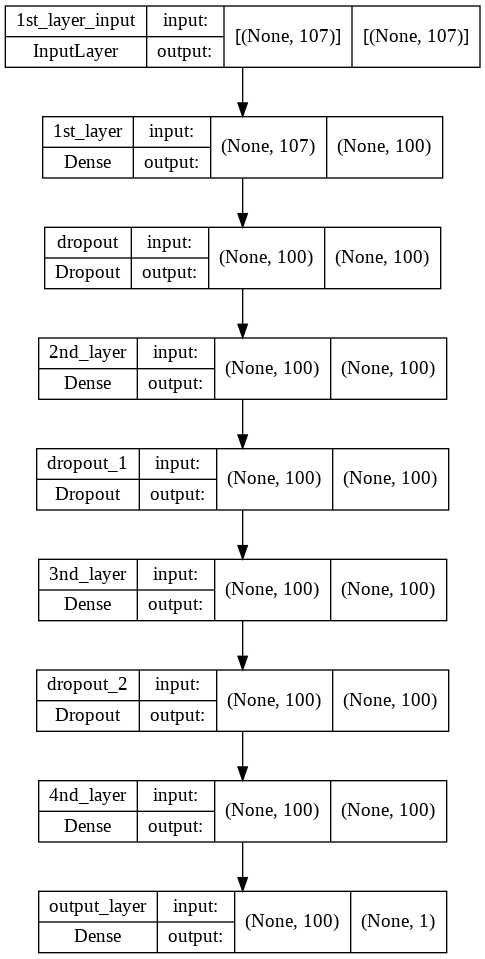

In [17]:
model_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(100, activation='relu', name="1st_layer", input_shape=[input_shape[1]]),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(100, activation='relu', name="2nd_layer"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(100, activation='relu', name="3nd_layer"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(100, activation='relu', name="4nd_layer"),
              tf.keras.layers.Dense(1, activation='sigmoid', name="output_layer")
], name="model_1")

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
plot_model(model_1, show_shapes=True)

In [18]:
history_1 = model_1.fit(x_train, y_train, 
                      epochs=30, 
                      batch_size=32, 
                      validation_data=(x_test, y_test),
                      verbose=False)

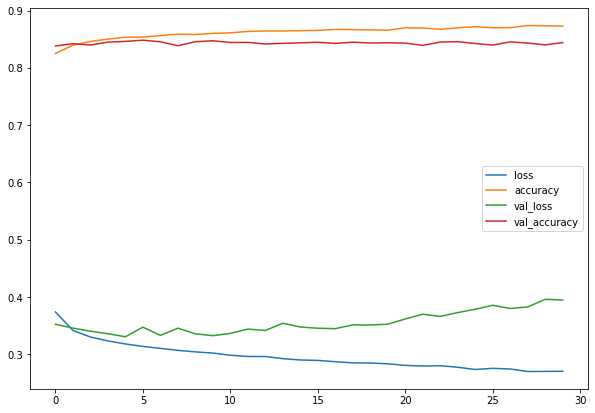

In [19]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [20]:
forest = RandomForestClassifier(n_estimators=5000, random_state=SEED, verbose=1)
forest = forest.fit(x_train, y_train)
forest.verbose = 0 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  3.6min finished


In [21]:
y_pred_dnn = model_1.predict(x_test)
y_pred_forest = forest.predict(x_test)

In [22]:
print("\tCLASIFICATION REPORT FOR NEURAL NET MODEL\n")
print(classification_report(y_test, np.round(y_pred_dnn)))

	CLASIFICATION REPORT FOR NEURAL NET MODEL

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4918
           1       0.69      0.65      0.67      1595

    accuracy                           0.84      6513
   macro avg       0.79      0.78      0.78      6513
weighted avg       0.84      0.84      0.84      6513



In [23]:
print("\tCLASIFICATION REPORT FOR RANDOM FOREST MODEL\n")
print(classification_report(y_test, y_pred_forest))

	CLASIFICATION REPORT FOR RANDOM FOREST MODEL

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4918
           1       0.73      0.63      0.67      1595

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [24]:
print(f"Accuracy for neural net model: \t\t{round(accuracy_score(y_test, np.round(y_pred_dnn)), 4) * 100}% ")
print(f"Accuracy for random forest model:\t{round(accuracy_score(y_test, y_pred_forest), 4) * 100}% ")

Accuracy for neural net model: 		84.42% 
Accuracy for random forest model:	85.06% 
